## Final Project Submission

Please fill out:
* Student name: Christos, Marcos and Rachel
* Student pace: Full Time
* Scheduled project review date/time: 02/19/2021 - 5p.m. CT
* Instructor name: Max Barry
* Blog post URL: www.google.com


# **Goal**: To create a model to get the highest accuracy possible using Multiple Regression

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn import ensemble
import yaml
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [282]:
# Reading and naming our dataframe
df = pd.read_csv("data/kc_house_data.csv")

In [283]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [284]:
fsm_kc = "price~bedrooms+sqft_living+bathrooms+waterfront"
fsm_kc_mod = ols(formula=fsm_kc, data=df).fit()
fsm_kc_mod_summ = fsm_kc_mod.summary()

In [285]:
fsm_kc_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     5810.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:13:10   Log-Likelihood:            -2.6621e+05
No. Observations:               19221   AIC:                         5.324e+05
Df Residuals:                   19216   BIC:                         5.325e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.673e+04   7149.225      9.333      0.000    5.27e+04    8.07e+04
bedrooms    -5.208e+04   2418.637    -21.532      0.000   -5.68e+04   -4.73e+04
sqft_living   300.5489      3.197     93.998      0.000     294.282     306.816
bathrooms    8744.8894   3628.591      2.410      0.016    1632.533    1.59e+04
waterfront    8.26e+05    2.1e+04     39.322      0.000    7.85e+05    8.67e+05
==============================================================================
Omnibus:                    11832.352   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380060.839
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      24.232   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Here we start our exploratory data analysis

In [286]:
# Checking the shape of it to understand how many columns and rows we have
df.shape

(21597, 21)

In [287]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

First thing we notice is that the Zip Code, Lat, Long are still  numbers, what would affect badly our model. Considering that the other numbers we have are a good translation to the categorical way to evaluate.

In [383]:
df['zipcode'] = df['zipcode'].astype(str)

In [384]:
df['lat'] = df['lat'].astype(str)

In [385]:
df['long'] = df['long'].astype(str)

In [288]:
# Getting statiscal values for our dataset, easy to look for outliers
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [289]:
# We check for outliers in every column, starting from bottom and top (ascending=False and ascending=True), and we verify that
# almost every outlier is "justified" and relevant for our model (Trial and error)

In [290]:
# We check for this bedrooms outlier and realize that is a mistake by checking on the website and comparing to the total sqft.

In [291]:
# Removing the house with 33 bedrooms that was clearly a mistake
df = df.sort_values(['bedrooms'], ascending=False)[1:]

In [292]:
# We checked for the sqft_living outlier, the house id is 1225069038 and it is 
# on 26408 NE 70TH ST 98053, it's a equine rehab center, and judging by what it is and the sqft_living15, it is not a typo.

In [293]:
df.duplicated().sum()

0

In [294]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

So, after the first analysis, we realize that:

1 - We don't have any duplicates

2 - We have some NaN values

3 - We have some outliers based on price, number of bedrooms, square footage - they could be either correlated (justified) or a mistake.

4 - We have some potential values that could be aggregated (like ZipCode), or deleted because have similar meaning.

5 - After that we would have more unique values, poiting towards being optimal to transform into a categorical value

### Here we start manipulation of the data

Let's create a column with the year that it was sold, instead of the full date that is hard to work with.

In [295]:
# First we create a for loop to create a list with only the years of each sale
year_list = []
for x in df['date']:
    year_list.append(x[-4:])

df['year_sold'] = year_list

In [296]:
# We choose to check if our value is string, and if so, we change it to float because of the function we want to run
type(df['year_sold'][0])

str

In [297]:
df['year_sold'] = df['year_sold'].astype(float)

In [298]:
df['year_sold'] = np.where(df['year_sold']== '2014', 0, 1)

In [299]:
# Now we drop date and id columns, because we don't want any noise
# in our model with variables that actually don't mean much
# Also for some of the code, it tries to transform everything into float, and it can't handle the date format
df = df.drop(columns=['id', 'date'])

In [300]:
# Now we want to clean our data, replacing NaN Values and unknown values (such as "?")
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [301]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [302]:
# The 'condition' columns also had a few "?" values, that we may as well replace with 0's
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])

In [303]:
df['condition'] = df['condition'].astype(float)

In [304]:
df['devland'] = df['sqft_living']/df['sqft_lot']

> The choice to replace with 0's in these two cases is that we read the 0 as lack of something. In the first case, lack of a basement in the house, in the second, lack of the evaluation.

# Which strategy to adopt with the NaN Values?

In [305]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_sold           0
devland             0
dtype: int64

In [306]:
df['waterfront'].value_counts()



0.0    19074
1.0      146
Name: waterfront, dtype: int64

Maybe replace nan values with 0, since it's very unlikely that such an important thing would not be mentioned

In [307]:
df['yr_renovated'].value_counts()


0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1976.0        1
1944.0        1
1948.0        1
1950.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [308]:
df['view'].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

0 in these 2 last columns('yr_renovated' and 'view') is adopted as "We don't know this value"(basically a NaN) or we don't have this (a view or a renovation). So 0 would be also a good replacement for it.

So based on our dataframe all the values are fitable of replacing the NaN value for a 0

In [309]:
df = df.fillna(0)

In [310]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
devland          0
dtype: int64

No NaN values. Good to go!

### Let's take a look at the possible places that we could make a categorical variable, maybe use OneHotEncoder on it

In [311]:
df.nunique()

price             3622
bedrooms            11
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
year_sold            1
devland          19139
dtype: int64

In [312]:
list_unique = list(df.nunique())
list_unique.sort()

In [313]:
print(list_unique)


[1, 2, 5, 5, 6, 11, 11, 29, 70, 70, 116, 303, 751, 777, 942, 1034, 3622, 5033, 8682, 9776, 19139]


So we see that the first 7 values are under 12 unique values, which means it's a potential good candidate to be a categorical variable

And they are 'year_sold', 'waterfront', 'view', 'condition', 'floors', 'grade' and 'bedrooms'.

The 'year_sold' is already done. We made it before when we were having problems with date format before.

In [314]:
df['waterfront'].value_counts()

0.0    21450
1.0      146
Name: waterfront, dtype: int64

In [315]:
df['year_sold'].value_counts()

1    21596
Name: year_sold, dtype: int64

In [316]:
# df['waterfront'] and df['year_sold'] are pretty much done

In [317]:
df['view'].value_counts()

0.0    19484
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [318]:
df['condition'].value_counts()

3.0    14020
4.0     5677
5.0     1700
2.0      170
1.0       29
Name: condition, dtype: int64

In [319]:
# df['view'] and df['condition'] are well fitted with their values, so we can say it's categorical already

In [320]:
df['floors'].value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [321]:
# df['floors'] has some different values that are float but that's ok, we are going to let the model deal with it.

### Let's create a new column to simply tell us if the house has a basement or not

In [322]:
# Replacing any abnormal values with 0's
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [323]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [324]:
df['has_basement'] = np.where(df['sqft_basement']>0, 1, 0)

In [325]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,devland,has_basement
8748,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3.0,7,...,1918,1999.0,98106,47.5560,-122.363,1420,4960,1,0.604839,1
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3.0,9,...,2008,0.0,98004,47.5861,-122.113,2730,10400,1,0.420330,1
19239,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4.0,7,...,1913,0.0,98105,47.6635,-122.320,1810,3745,1,0.779706,1


## Now we are going to check for variables with correlation over 0.7 and try to understand them better


In [326]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,devland,has_basement
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,...,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,NaN,0.123066,0.178255
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,...,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,NaN,0.027760,0.160391
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,...,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,NaN,0.287012,0.159897
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,...,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,NaN,0.076984,0.201236
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,...,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,NaN,-0.252603,-0.034877
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,...,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,NaN,0.556703,-0.252426
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,...,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657,NaN,-0.029807,0.039227
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,...,-0.054464,0.090337,0.085066,0.006334,-0.077715,0.278921,0.073079,NaN,-0.002227,0.176930
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,...,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,NaN,-0.156500,0.130422
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,0.249077,-0.146854,1.000000,...,0.447854,0.015618,-0.185761,0.113602,0.200324,0.713863,0.120974,NaN,0.191394,0.050736


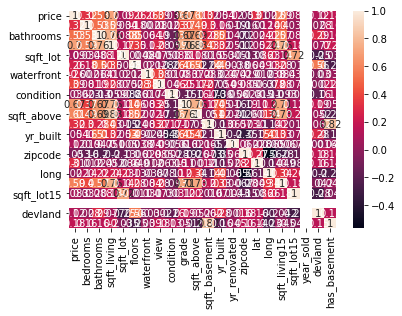

In [329]:
sns.heatmap(df.corr(), annot=True);


# These 2 functions have an objective to give us the highest n correlation in our data frame.
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df, 15))

### df['sqft_lot'] < df['sqft_lot15']

In [330]:
print(df.corr()['sqft_lot'].sum(), df.corr()['sqft_lot15'].sum())

2.4306052502899425 2.489070335880126


In [331]:
# Sqft_lot has a lower correlation with other variables and a higher one with price - a no brainer

### df['sqft_living'] > df['sqft_living15']

In [332]:
print(df.corr()['sqft_living'].sum(), df.corr()['sqft_living15'].sum())

7.654846021849599 6.2737108648161515


In [333]:
# But sqft_living is more highly correlated with Price by quite a lot

### Here we did some modeling changing variables and choosing different datasets without different outliers (Without the highest price, Without the top 3 highest price, without the lowest price and etc)

**First Simple Model***

In [340]:
price_kctest = "price~bedrooms+sqft_living+waterfront"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()

In [341]:
pricekc_mod_summtest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     8503.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:34:09   Log-Likelihood:            -2.9896e+05
No. Observations:               21596   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.624e+04   6538.559     13.190      0.000    7.34e+04    9.91e+04
bedrooms    -5.555e+04   2333.140    -23.808      0.000   -6.01e+04    -5.1e+04
sqft_living   305.6074      2.310    132.285      0.000     301.079     310.136
waterfront   8.254e+05   2.08e+04     39.610      0.000    7.85e+05    8.66e+05
==============================================================================
Omnibus:                    13002.578   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389940.087
Skew:                           2.383   Prob(JB):                         0.00
Kurtosis:                      23.264   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

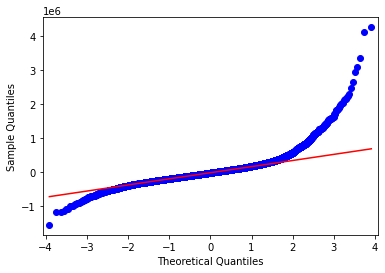

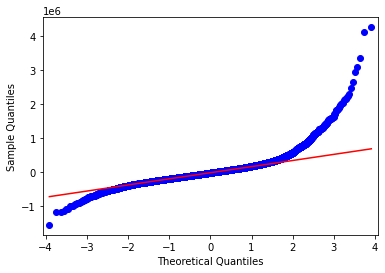

In [346]:
qqplot(pricekc_modtest.resid, line = 'q')

In [338]:
columnsdf = list(df.columns)

C:\Users\celes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\celes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\celes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


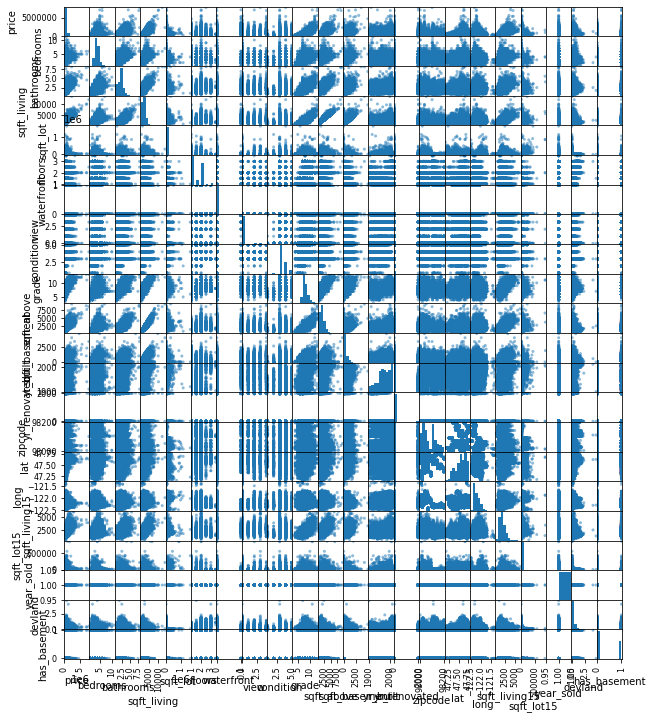

In [339]:
pd.plotting.scatter_matrix(df[columnsdf], figsize=(10,12));

In [381]:
# Model using almost everything, but getting the other statistical values to be bad
price_kc3 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod3 = ols(formula=price_kc3, data=df).fit()
pricekc_mod_summ3 = pricekc_mod3.summary()


In [382]:
pricekc_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3050.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:59:50   Log-Likelihood:            -2.9559e+05
No. Observations:               21596   AIC:                         5.912e+05
Df Residuals:                   21581   BIC:                         5.913e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.652e+06   3.06e+06      2.502      0.012    1.66e+06    1.36e+07
bedrooms     -5.416e+04   2068.511    -26.183      0.000   -5.82e+04   -5.01e+04
bathrooms     5.253e+04   3472.089     15.130      0.000    4.57e+04    5.93e+04
sqft_living    271.9640      2.751     98.872      0.000     266.573     277.356
sqft_lot        -0.0595      0.037     -1.619      0.105      -0.132       0.013
floors        3.074e+04   3618.796      8.494      0.000    2.36e+04    3.78e+04
waterfront    5.871e+05   1.92e+04     30.623      0.000     5.5e+05    6.25e+05
view          6.578e+04   2187.061     30.078      0.000    6.15e+04    7.01e+04
condition     2.475e+04   2472.555     10.009      0.000    1.99e+04    2.96e+04
yr_built     -1865.8857     74.156    -25.162      0.000   -2011.236   -1720.535
yr_renovated    25.3028      4.203      6.020      0.000      17.065      33.541
has_basement -3.605e+04   3524.570    -10.229      0.000    -4.3e+04   -2.91e+04
zipcode       -718.5972     34.709    -20.703      0.000    -786.630    -650.564
lat           6.976e+05   1.12e+04     62.492      0.000    6.76e+05     7.2e+05
long         -2.719e+05   1.36e+04    -19.970      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15197.074   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           828997.627
Skew:                           2.797   Prob(JB):                         0.00
Kurtosis:                      32.833   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

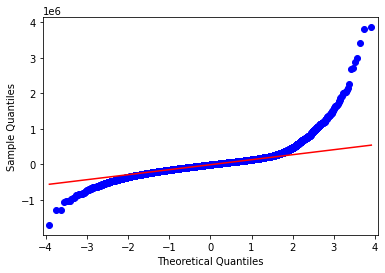

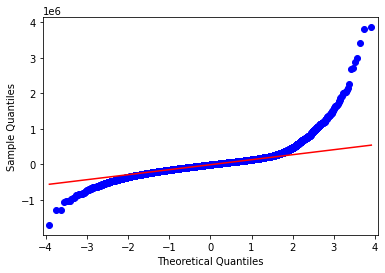

In [345]:
qqplot(pricekc_mod3.resid, line = 'q')

In [347]:
# Model using almost everything, but getting the other statistical values to be bad
price_kc4 = "price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+yr_built+has_basement+zipcode+lat+long"
pricekc_mod4 = ols(formula=price_kc4, data=df).fit()
pricekc_mod_summ4 = pricekc_mod4.summary()

In [348]:
pricekc_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3549.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:35:57   Log-Likelihood:            -2.9561e+05
No. Observations:               21596   AIC:                         5.912e+05
Df Residuals:                   21583   BIC:                         5.914e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.067e+06   3.04e+06      2.650      0.008     2.1e+06     1.4e+07
bedrooms     -5.429e+04   2061.791    -26.332      0.000   -5.83e+04   -5.03e+04
bathrooms     5.523e+04   3447.375     16.020      0.000    4.85e+04     6.2e+04
sqft_living    271.2198      2.722     99.638      0.000     265.884     276.555
floors          3.2e+04   3613.766      8.855      0.000    2.49e+04    3.91e+04
waterfront    5.923e+05   1.92e+04     30.898      0.000    5.55e+05     6.3e+05
view          6.597e+04   2186.512     30.170      0.000    6.17e+04    7.03e+04
condition     2.253e+04   2445.686      9.211      0.000    1.77e+04    2.73e+04
yr_built     -1988.7369     70.973    -28.021      0.000   -2127.850   -1849.624
has_basement -3.599e+04   3525.343    -10.209      0.000   -4.29e+04   -2.91e+04
zipcode       -722.6589     34.731    -20.807      0.000    -790.735    -654.583
lat           6.968e+05   1.11e+04     62.573      0.000    6.75e+05    7.19e+05
long         -2.741e+05   1.34e+04    -20.429      0.000      -3e+05   -2.48e+05
==============================================================================
Omnibus:                    15231.376   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           836635.603
Skew:                           2.804   Prob(JB):                         0.00
Kurtosis:                      32.972   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

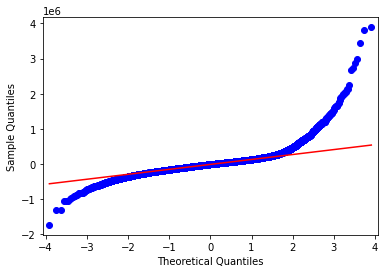

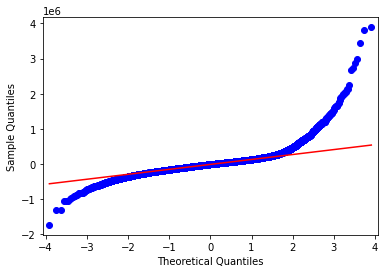

In [349]:
qqplot(pricekc_mod4.resid, line = 'q')

In [350]:
# Model using almost everything, but getting the other statistical values to be bad
price_kc5 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod5 = ols(formula=price_kc5, data=df).fit()
pricekc_mod_summ5 = pricekc_mod5.summary()

In [351]:
pricekc_mod_summ5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3050.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:36:11   Log-Likelihood:            -2.9559e+05
No. Observations:               21596   AIC:                         5.912e+05
Df Residuals:                   21581   BIC:                         5.913e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.652e+06   3.06e+06      2.502      0.012    1.66e+06    1.36e+07
bedrooms     -5.416e+04   2068.511    -26.183      0.000   -5.82e+04   -5.01e+04
bathrooms     5.253e+04   3472.089     15.130      0.000    4.57e+04    5.93e+04
sqft_living    271.9640      2.751     98.872      0.000     266.573     277.356
sqft_lot        -0.0595      0.037     -1.619      0.105      -0.132       0.013
floors        3.074e+04   3618.796      8.494      0.000    2.36e+04    3.78e+04
waterfront    5.871e+05   1.92e+04     30.623      0.000     5.5e+05    6.25e+05
view          6.578e+04   2187.061     30.078      0.000    6.15e+04    7.01e+04
condition     2.475e+04   2472.555     10.009      0.000    1.99e+04    2.96e+04
yr_built     -1865.8857     74.156    -25.162      0.000   -2011.236   -1720.535
yr_renovated    25.3028      4.203      6.020      0.000      17.065      33.541
has_basement -3.605e+04   3524.570    -10.229      0.000    -4.3e+04   -2.91e+04
zipcode       -718.5972     34.709    -20.703      0.000    -786.630    -650.564
lat           6.976e+05   1.12e+04     62.492      0.000    6.76e+05     7.2e+05
long         -2.719e+05   1.36e+04    -19.970      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15197.074   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           828997.627
Skew:                           2.797   Prob(JB):                         0.00
Kurtosis:                      32.833   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

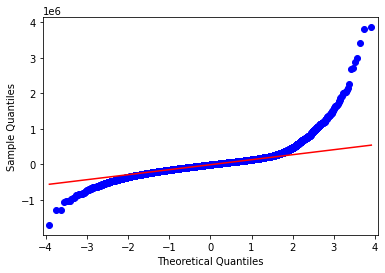

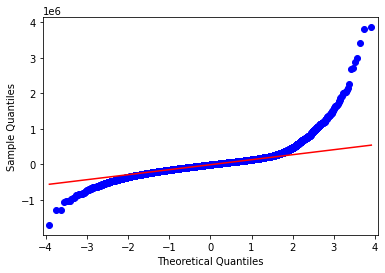

In [352]:
qqplot(pricekc_mod5.resid, line = 'q')

### Modifying the data even more before using it on the model

Here we try some logging before using it on the model. Our decision was based on the correlation matrix and the qq-plot.

**We also branch to a new dataframe called "dftest" for organizational reasons**

In [421]:
dftest = df.sort_values(['price'], ascending=True)

In [422]:
dftest['price_log'] = np.log(df['price'])
dftest['sqft_lot_log'] = np.log(df['sqft_lot'])
dftest['sqft_above_log'] = np.log(df['sqft_above'])
dftest['sqft_living15_log'] = np.log(df['sqft_living15'])
dftest['sqft_living_log'] = np.log(df['sqft_living'])
dftest['sqft_lot15_log'] = np.log(df['sqft_lot15'])
dftest['devland_log'] = np.log(df['devland'])

In [423]:
dftest.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,year_sold,devland,has_basement,price_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_living_log,sqft_lot15_log,devland_log
15279,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1.0,5,...,1,0.047724,0,11.264464,9.701616,6.659294,7.438384,6.659294,9.248310,-3.042322
465,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2.0,4,...,1,0.085149,0,11.289782,8.527144,6.063785,7.090077,6.063785,8.922658,-2.463358
16184,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1.0,5,...,1,0.073183,0,11.302204,9.207837,6.593045,6.756932,6.593045,9.104980,-2.614793


In [391]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'devland', 'has_basement'],
      dtype='object')

In [427]:
test = "price_log~bedrooms+sqft_living_log+sqft_lot_log+floors+waterfront+view+condition+grade+sqft_above_log+yr_built+yr_renovated+has_basement+zipcode+lat+long"
test_mod = ols(formula=test, data=dftest).fit()
test_mod_summ = test_mod.summary()

In [428]:
test_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     31.25
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:16:05   Log-Likelihood:                 10582.
No. Observations:               21596   AIC:                            -9457.
Df Residuals:                   15742   BIC:                         3.726e+04
Df Model:                        5853                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.7004      0.226     29.694      0.000       6.258       7.143
zipcode[T.98002]               -0.0547      0.031     -1.768      0.077      -0.115       0.006
zipcode[T.98003]                0.1076      0.021      5.119      0.000       0.066       0.149
zipcode[T.98004]                0.5935      0.054     11.058      0.000       0.488       0.699
zipcode[T.98005]                0.2743      0.055      4.971      0.000       0.166       0.382
zipcode[T.98006]                0.2895      0.051      5.665      0.000       0.189       0.390
zipcode[T.98007]                0.1500      0.057      2.626      0.009       0.038       0.262
zipcode[T.98008]                0.1547      0.056      2.754      0.006       0.045       0.265
zipcode[T.98010]                0.2334      0.041      5.703      0.000       0.153       0.314
zipcode[T.98011]                0.0716      0.059      1.205      0.228      -0.045       0.188
zipcode[T.98014]               -0.0694      0.072     -0.962      0.336      -0.211       0.072
zipcode[T.98019]                0.0075      0.068      0.110      0.913      -0.126       0.141
zipcode[T.98022]                0.1314      0.071      1.849      0.064      -0.008       0.271
zipcode[T.98023]                0.0937      0.032      2.901      0.004       0.030       0.157
zipcode[T.98024]                0.0601      0.069      0.870      0.384      -0.075       0.195
zipcode[T.98027]                0.2692      0.054      4.989      0.000       0.163       0.375
zipcode[T.98028]                0.0231      0.056      0.413      0.680      -0.087       0.133
zipcode[T.98029]                0.1902      0.059      3.242      0.001       0.075       0.305
zipcode[T.98030]                0.0268      0.033      0.820      0.412      -0.037       0.091
zipcode[T.98031]                0.0337      0.037      0.901      0.368      -0.040       0.107
zipcode[T.98032]               -0.0525      0.029     -1.816      0.069      -0.109       0.004
zipcode[T.98033]                0.2937      0.057      5.186      0.000       0.183       0.405
zipcode[T.98034]                0.0705      0.056      1.251      0.211      -0.040       0.181
zipcode[T.98038]                0.1251      0.039      3.230      0.001       0.049       0.201
zipcode[T.98039]                0.7512      0.059     12.791      0.000       0.636       0.866
zipcode[T.98040]                0.4399      0.049      8.981      0.000       0.344       0.536
zipcode[T.98042]                0.0623      0.033      1.888      0.059      -0.002       0.127
zipcode[T.98045]                0.2618      0.119      2.207      0.027       0.029       0.494
zipcode[T.98052]                0.1586      0.058      2.755      0.006       0.046       0.271
zipcode[T.9

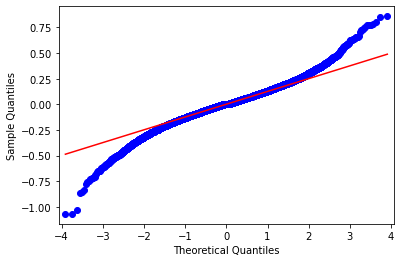

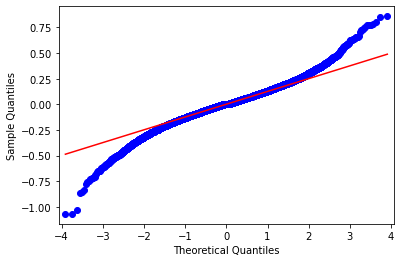

In [429]:
qqplot(test_mod.resid, line = 'q')

In [362]:
test1 = "price_log~bedrooms+bathrooms+sqft_living_log+sqft_lot_log+floors+waterfront+view+condition+grade+sqft_above_log+yr_built+yr_renovated+has_basement"
test_mod1 = ols(formula=test1, data=dftest).fit()
test_mod_summ1 = test_mod1.summary()

In [363]:
test_mod_summ1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3133.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:42:41   Log-Likelihood:                -5343.7
No. Observations:               21596   AIC:                         1.072e+04
Df Residuals:                   21582   BIC:                         1.083e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.0973      0.206     92.568      0.000      18.693      19.502
bedrooms           -0.0381      0.003    -12.023      0.000      -0.044      -0.032
bathrooms           0.0692      0.005     13.874      0.000       0.059       0.079
sqft_living_log     0.3096      0.021     14.838      0.000       0.269       0.350
sqft_lot_log       -0.0379      0.003    -12.967      0.000      -0.044      -0.032
floors              0.0605      0.006     10.057      0.000       0.049       0.072
waterfront          0.3731      0.028     13.363      0.000       0.318       0.428
view                0.0550      0.003     17.353      0.000       0.049       0.061
condition           0.0396      0.004     11.055      0.000       0.033       0.047
grade               0.2276      0.003     74.827      0.000       0.222       0.234
sqft_above_log      0.1134      0.021      5.485      0.000       0.073       0.154
yr_built           -0.0055      0.000    -55.301      0.000      -0.006      -0.005
yr_renovated     1.079e-05   6.11e-06      1.765      0.078    -1.2e-06    2.28e-05
has_basement        0.0840      0.009      9.658      0.000       0.067       0.101
==============================================================================
Omnibus:                       69.903   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.840
Skew:                          -0.040   Prob(JB):                     3.10e-20
Kurtosis:                       3.306   Cond. No.                     1.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

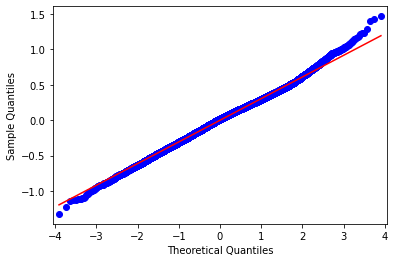

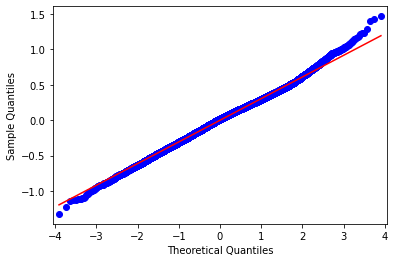

In [364]:
qqplot(test_mod1.resid, line = 'q')

In [366]:
y_hat = test_mod1.predict(dftest)

In [367]:
y = test_mod1.resid

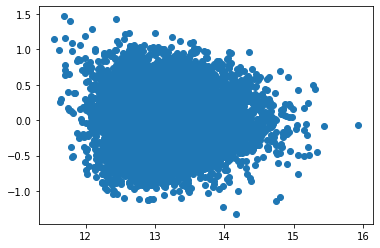

In [368]:
plt.pyplot.scatter(y_hat, y)

### Not using the columns with high multicolinearity between other variables, and possible high between the value and the target

In [452]:
dftest.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront           float64
view                 float64
condition            float64
grade                  int64
sqft_above             int64
sqft_basement        float64
yr_built               int64
yr_renovated         float64
zipcode                int32
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
year_sold              int32
devland              float64
has_basement           int32
price_log            float64
sqft_lot_log         float64
sqft_above_log       float64
sqft_living15_log    float64
sqft_living_log      float64
sqft_lot15_log       float64
devland_log          float64
dtype: object

In [451]:
dftest['zipcode'] = df['zipcode'].astype(int)
dftest['lat'] = df['lat'].astype(float)
dftest['long'] = df['long'].astype(float)
dftest['condition'] = df['condition'].astype(float)

In [431]:
listaaa = 'bedrooms+bathrooms+sqft_living_log+sqft_lot_log+floors+waterfront+view+condition+grade+sqft_above_log+yr_built+yr_renovated+has_basement+zipcode'
colunasdoteutoba = listaaa.split('+')
colunasdoteutoba

['bedrooms',
 'bathrooms',
 'sqft_living_log',
 'sqft_lot_log',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above_log',
 'yr_built',
 'yr_renovated',
 'has_basement',
 'zipcode']

In [432]:
def get_redundant_pairs(dftest):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = dftest.columns
    for i in range(0, dftest.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(dftest, n=5):
    au_corr = dftest.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(dftest)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(dftest, 33))

sqft_living15      sqft_living15_log    0.976818
sqft_above         sqft_above_log       0.962545
sqft_living        sqft_living_log      0.954607
sqft_lot_log       sqft_lot15_log       0.918666
price              price_log            0.891746
sqft_lot_log       devland_log          0.885386
sqft_living        sqft_above           0.876448
sqft_above_log     sqft_living_log      0.864986
sqft_living        sqft_above_log       0.843135
sqft_above         sqft_living_log      0.832383
devland            devland_log          0.822547
sqft_basement      has_basement         0.820892
sqft_lot15_log     devland_log          0.811611
sqft_living        grade                0.762776
bathrooms          sqft_living_log      0.762133
sqft_living        sqft_living15        0.756400
grade              sqft_above           0.756069
bathrooms          sqft_living          0.755755
sqft_living15_log  sqft_living_log      0.746839
grade              sqft_living_log      0.743036
                   s

In [433]:
dftest.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,year_sold,devland,has_basement,price_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_living_log,sqft_lot15_log,devland_log
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,...,NaN,0.123066,0.178255,0.891746,0.161566,0.542703,0.543857,0.611846,0.147923,0.131909
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,...,NaN,0.027760,0.160391,0.350871,0.189953,0.530353,0.418235,0.637670,0.167168,0.114923
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,...,NaN,0.287012,0.159897,0.551270,0.100617,0.695838,0.571791,0.762133,0.091963,0.269539
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,...,NaN,0.076984,0.201236,0.695209,0.344665,0.843135,0.732179,0.954607,0.321010,0.108987
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,...,NaN,-0.252603,-0.034877,0.100032,0.638607,0.163616,0.145155,0.150098,0.550134,-0.593970
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,...,NaN,0.556703,-0.252426,0.310665,-0.237479,0.547599,0.275443,0.367556,-0.227256,0.429059
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,...,NaN,-0.029807,0.039227,0.170724,0.072339,0.059123,0.076501,0.078898,0.081560,-0.036847
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,...,NaN,-0.002227,0.176930,0.344665,0.121747,0.157009,0.262548,0.244800,0.119111,-0.006936
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,...,NaN,-0.156500,0.130422,0.038855,0.073741,-0.150635,-0.089150,-0.049584,0.079944,-0.101490
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,0.249077,-0.146854,1.000000,...,NaN,0.191394,0.050736,0.703747,0.184316,0.742866,0.689050,0.743036,0.184987,0.172627


LOT: 
sqft_lot_log       sqft_lot15_log       0.918666
sqft_lot_log       devland_log          0.885386
sqft_lot15_log     devland_log          0.811611
devland            sqft_lot_log         0.737891
sqft_lot           sqft_lot15           0.718203

sqft_lot15         sqft_lot15_log       0.701522


LIVING:
sqft_living15      sqft_living15_log    0.976818
sqft_living        sqft_living_log      0.954607
sqft_living        sqft_above           0.876448
sqft_above_log     sqft_living_log      0.864986
sqft_living        sqft_above_log       0.843135
sqft_above         sqft_living_log      0.832383
sqft_living        grade                0.762776
bathrooms          sqft_living_log      0.762133
sqft_living        sqft_living15        0.756400
bathrooms          sqft_living          0.755755
sqft_living15_log  sqft_living_log      0.746839
grade              sqft_living_log      0.743036
sqft_above_log     sqft_living15_log    0.713088
sqft_above         sqft_living15_log    0.701732


price:
living15 > living15_log
living > living_log

lot_log > lot
lot15_log > lot15

sqft_above > sqft_above_log

grade = 0.667964
devland_log = 0.131909


In [193]:
# We checked for outliers by our distribuition, verified for the 75 percentile, 95 percentile and tried without them and
# realized that our R-Squared was actually dropping it, meaning that they are significant for our model.

In [194]:
# We checked for outliers by our distribuition in the other side, veryfing if cheaper houses
# would interfere a lot and tried FSM without them and realized that our 
# R-Squared was actually dropping it, meaning that they are significant for our model.

# Linear Regression

In [434]:
y = df['price']
predictors = df.drop('price', axis=1)
linreg = LinearRegression()
linreg.fit(predictors, y)
linreg.coef_

array([-3.77086383e+04,  4.00050474e+04,  8.83544033e+01,  1.79813494e-01,
       -2.47576954e+04,  6.27748848e+05,  5.31276448e+04,  2.66168633e+04,
        9.50882285e+04,  9.93735535e+01,  6.83088584e+01, -2.80057531e+03,
        2.27323464e+01, -6.12771163e+02,  5.86048060e+05, -1.95805339e+05,
        2.71983156e+01, -2.71808510e-01,  3.49245965e-10,  1.01572520e+05,
       -1.96774734e+04])

In [435]:
linreg.intercept_

13139627.705290802

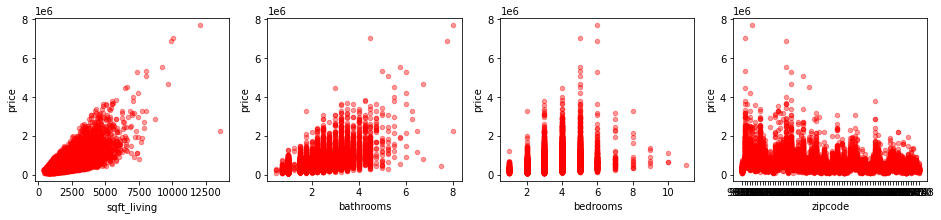

In [436]:
fig, axes = plt.pyplot.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bathrooms', 'bedrooms', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

<ipython-input-437-836a0b19fd3b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>],
       [<AxesSubplot:title={'center':'year_sold'}>,
        <AxesSubplot:title={'center':'devland'}>,
        <AxesSubplot:title={'center':'has_basement'}>, <AxesSubpl

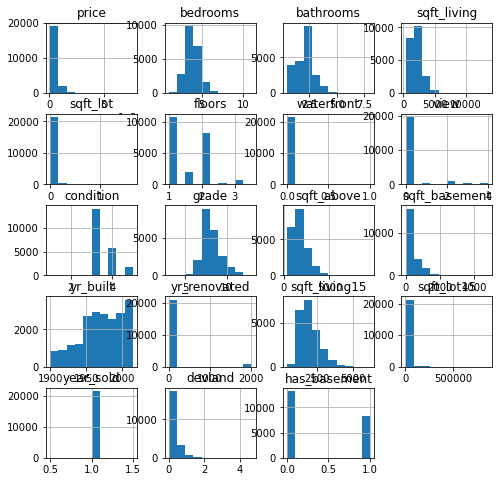

In [437]:
fig = plt.pyplot.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

In [438]:
df['yr_renovated'].nunique()
# 0.117855 corr w Price

70

In [439]:
df['sqft_lot'].nunique()
# 0.089876 corr w Price

9776

# Train Test Split

In [440]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,devland,has_basement
8748,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3.0,7,...,1918,1999.0,98106,47.556000000000004,-122.363,1420,4960,1,0.604839,1
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3.0,9,...,2008,0.0,98004,47.5861,-122.113,2730,10400,1,0.420330,1
19239,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4.0,7,...,1913,0.0,98105,47.6635,-122.32,1810,3745,1,0.779706,1


In [441]:
y = df.price
X = df.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=22)

In [442]:
lr = LinearRegression()

In [443]:
lr.fit(X_train, y_train)

LinearRegression()

In [444]:
lr.score(X_train, y_train)

0.7065293276542781

In [445]:
lr.coef_


array([-3.30719923e+04,  3.80065824e+04,  6.06071691e+01,  1.89261581e-01,
       -2.57632983e+04,  6.13159608e+05,  5.16925276e+04,  2.72491751e+04,
        1.00598044e+05,  1.13951262e+02,  9.12423551e+01, -2.81145339e+03,
        2.06118718e+01, -5.84178585e+02,  5.73183067e+05, -1.89761233e+05,
        3.34914208e+01, -2.35903539e-01, -4.65661287e-10,  1.05911326e+05,
       -2.11161896e+04])

<AxesSubplot:>

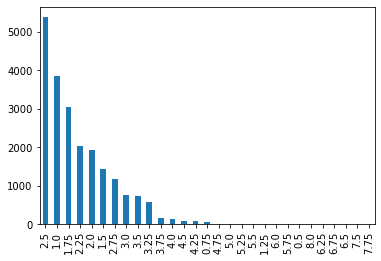

In [446]:
df['bathrooms'].value_counts().plot(kind='bar')

<AxesSubplot:>

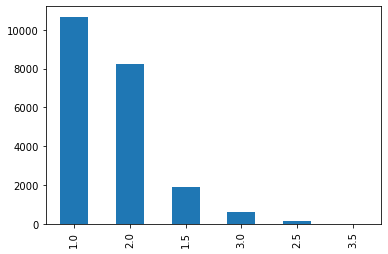

In [447]:
df['floors'].value_counts().plot(kind='bar')

In [448]:
most_expensive_df = df.sort_values(['price'], ascending=False)

In [449]:
most_expensive_df = most_expensive_df[0:30]

C:\Users\celes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

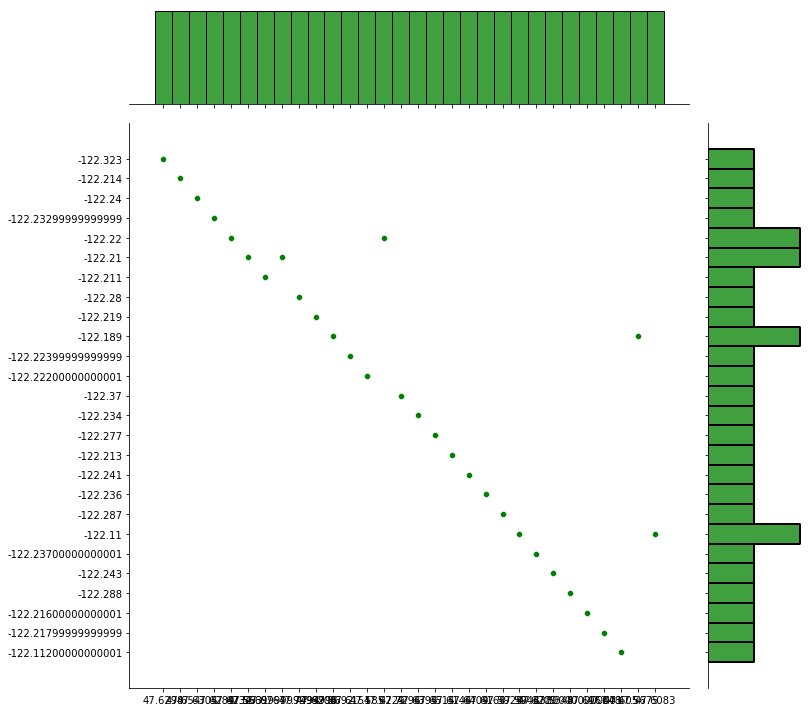

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [453]:
plt.pyplot.figure(figsize=(12, 12))
sns.jointplot(x=most_expensive_df.lat.values, y=most_expensive_df.long.values, size=10, color='g')
plt.pyplot.ylabel('Long', fontsize=12)
plt.pyplot.xlabel('Lat', fontsize=12)
plt.pyplot.show()
sns.despine

C:\Users\celes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

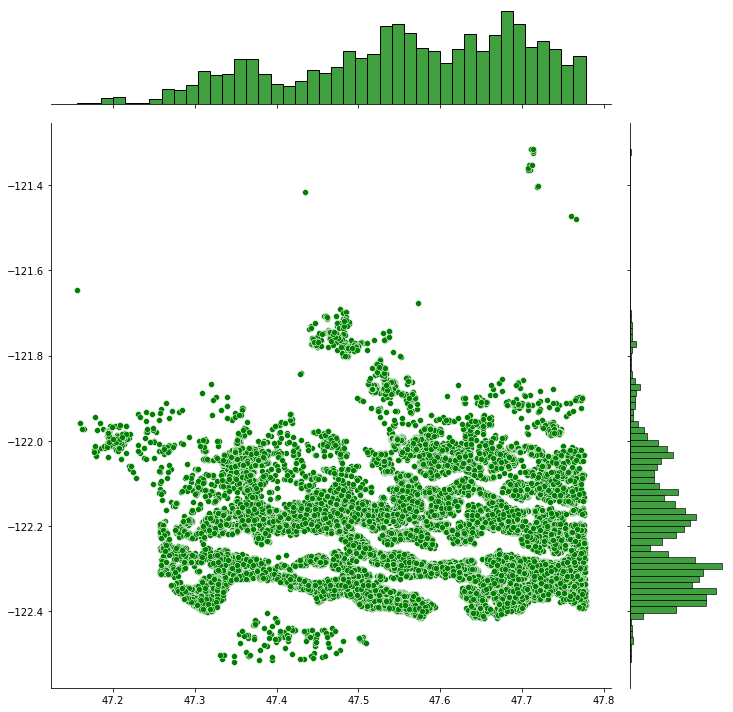

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [213]:
plt.pyplot.figure(figsize=(12, 12))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10, color='g')
plt.pyplot.ylabel('Long', fontsize=12)
plt.pyplot.xlabel('Lat', fontsize=12)
plt.pyplot.show()
sns.despine

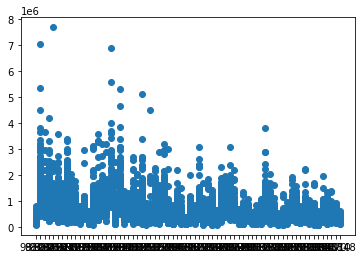

In [214]:
plt.pyplot.scatter(df.zipcode, df.price)

In [215]:
df_without_outliers = df.sort_values(['price'], ascending=False)[3:]

Text(0.5, 1.0, 'Prices per ZipCode (without the top 3)')

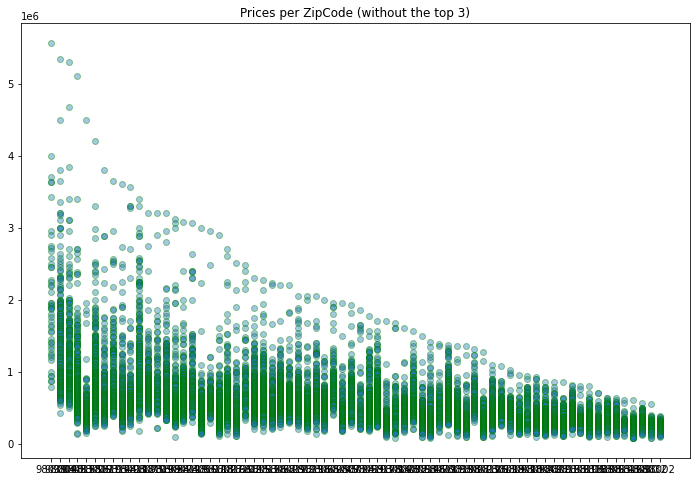

In [454]:
plt.pyplot.figure(figsize = (12,8))
plt.pyplot.scatter(df_without_outliers['zipcode'],df_without_outliers['price'], alpha=0.4, edgecolors='g')
plt.pyplot.title("Prices per ZipCode (without the top 3)")

In [255]:
y = df.price
X = df.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=30)

In [256]:
lr.fit(X_train, y_train)

LinearRegression()

In [257]:

lr.score(X_train, y_train)

0.7082682874850486

In [258]:
lr.score(X_test, y_test)

0.6913125963686457

In [244]:
lr.coef_

array([ 2.11591975e+02,  1.73663766e+04,  3.01563498e+02, -2.13822147e-01,
       -1.67051154e+04,  3.53887836e+05,  1.01609060e+04, -3.63204462e+03,
        8.43225931e+03, -1.95781592e+01,  1.02224781e+01, -3.11929438e+02,
        5.52096766e+00, -3.00571286e+02, -2.10343054e+05, -1.20968289e+05,
        7.23248847e+01, -4.93582391e-01,  5.12227416e-08,  1.30581318e+03,
        1.79401395e+04,  5.85895223e+05, -2.19648445e+05,  9.78804122e+04,
       -1.88205739e+05, -4.39111934e+05,  1.51320529e+04, -2.19463490e+05,
        1.02010183e+03])

### Here we try some Gradient Boosting Regressor

In [259]:
egbr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 25,
                                         learning_rate = 0.1, loss = 'ls')

In [260]:
egbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=25, n_estimators=500)

In [261]:
egbr.score(X_test, y_test)

0.877587256211614

### Here we try some KFold

In [262]:
X = dftest.drop('price', axis=1)
y = dftest.price

In [263]:
kf = KFold(n_splits=5)

train_r2 = []
test_r2 = []
for train_ind, test_ind in kf.split(X, y):
    
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]
    
    lr.fit(X_train, y_train)
    train_r2.append(lr.score(X_train, y_train))
    test_r2.append(lr.score(X_test, y_test))

In [264]:
np.mean(train_r2)

0.90145133263254

In [265]:
np.mean(test_r2)

-7.458190275461325

### Here some Polynomial Features

In [252]:
poly_2 = PolynomialFeatures(2)

df_poly = pd.DataFrame(
            poly_2.fit_transform(df.drop('price', axis=1))
                      )

X = df_poly
y = df.price

In [253]:
np.mean(train_r2)

0.90145133263254

In [254]:
np.mean(test_r2)

-7.458190275461325

In [232]:
# Log different columns formula = "price ~ bedrooms_log+bathrooms+sqft_living+sqft_lot_log+waterfront+view+condition+grade+yr_built+devland_log"
# 0.682

In [233]:
print(1)

1


In [234]:
dftest['zipcode'].nunique()

70

In [455]:
km = KMeans(n_clusters=60)
km.fit(dftest[['lat', 'long']])

KMeans(n_clusters=60)

In [456]:
km.__dict__

{'n_clusters': 60,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 'n_features_in_': 2,
 '_n_threads': 12,
 '_n_init': 10,
 '_tol': 1.9499157359458577e-06,
 '_algorithm': 'elkan',
 'cluster_centers_': array([[  47.30927593, -122.36163148],
        [  47.64785407, -122.35417851],
        [  47.55537398, -122.00707317],
        [  47.40023308, -122.19484826],
        [  47.69918416, -122.11209971],
        [  47.49795087, -122.3306783 ],
        [  47.365432  , -121.95116   ],
        [  47.47476565, -121.75968261],
        [  47.58580957, -122.17267536],
        [  47.7171124 , -122.29906818],
        [  47.21140693, -121.997329  ],
        [  47.67615714, -121.90256122],
        [  47.3684557 , -122.09657595],
        [  47.64912145, -122.39871601],
        [  47.61694892, -122.04963511],
        [  47.71057308, -122.212875

In [457]:
aa = km.labels_

In [458]:
dftest['Regions'] = aa

C:\Users\celes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:226: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

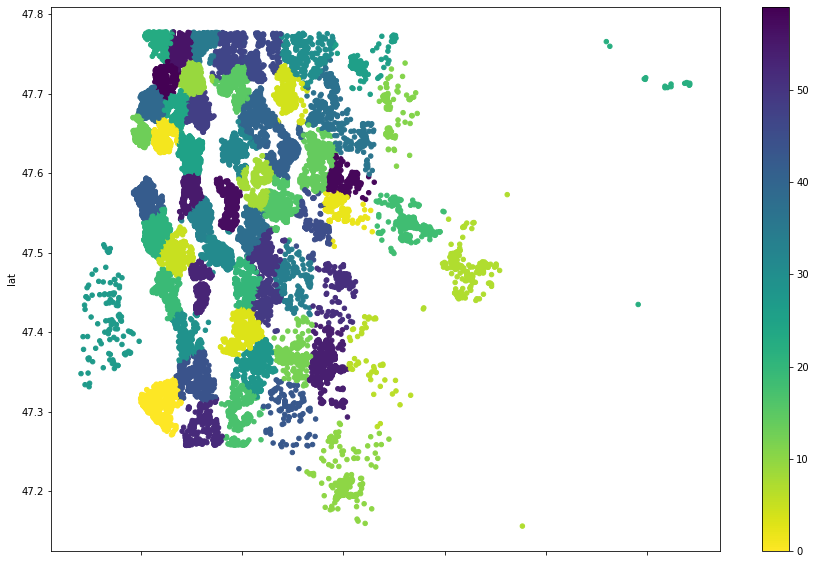

In [459]:
dftest.plot('long', 'lat', kind='scatter', color=aa, figsize=(15,10), colormap='viridis_r')

In [461]:
dftest.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'devland', 'has_basement',
       'price_log', 'sqft_lot_log', 'sqft_above_log', 'sqft_living15_log',
       'sqft_living_log', 'sqft_lot15_log', 'devland_log', 'Regions'],
      dtype='object')

In [465]:
dftest.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,devland,has_basement,price_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_living_log,sqft_lot15_log,devland_log,Regions
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,...,0.123066,0.178255,0.891746,0.161566,0.542703,0.543857,0.611846,0.147923,0.131909,0.004046
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,...,0.027760,0.160391,0.350871,0.189953,0.530353,0.418235,0.637670,0.167168,0.114923,0.019777
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,...,0.287012,0.159897,0.551270,0.100617,0.695838,0.571791,0.762133,0.091963,0.269539,0.010103
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,...,0.076984,0.201236,0.695209,0.344665,0.843135,0.732179,0.954607,0.321010,0.108987,0.013609
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,...,-0.252603,-0.034877,0.100032,0.638607,0.163616,0.145155,0.150098,0.550134,-0.593970,-0.030164
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,...,0.556703,-0.252426,0.310665,-0.237479,0.547599,0.275443,0.367556,-0.227256,0.429059,-0.002654
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,...,-0.029807,0.039227,0.170724,0.072339,0.059123,0.076501,0.078898,0.081560,-0.036847,-0.000716
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,...,-0.002227,0.176930,0.344665,0.121747,0.157009,0.262548,0.244800,0.119111,-0.006936,-0.029196
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,...,-0.156500,0.130422,0.038855,0.073741,-0.150635,-0.089150,-0.049584,0.079944,-0.101490,0.029497
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,0.249077,-0.146854,1.000000,...,0.191394,0.050736,0.703747,0.184316,0.742866,0.689050,0.743036,0.184987,0.172627,-0.004981


In [471]:
testza = "price_log~bedrooms+sqft_living+sqft_lot_log+floors+waterfront+view+condition+grade+yr_renovated+has_basement"
test_modza = ols(formula=testza, data=dftest).fit()
test_mod_summza = test_modza.summary()

In [472]:
test_mod_summza


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3378.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:16:34   Log-Likelihood:                -6620.1
No. Observations:               21596   AIC:                         1.326e+04
Df Residuals:                   21585   BIC:                         1.335e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.1628      0.038    291.730      0.000      11.088      11.238
bedrooms        -0.0204      0.003     -6.480      0.000      -0.027      -0.014
sqft_living      0.0002   4.95e-06     41.463      0.000       0.000       0.000
sqft_lot_log    -0.0429      0.003    -14.017      0.000      -0.049      -0.037
floors           0.0256      0.006      4.504      0.000       0.014       0.037
waterfront       0.3431      0.030     11.581      0.000       0.285       0.401
view             0.0693      0.003     20.691      0.000       0.063       0.076
condition        0.1002      0.004     27.791      0.000       0.093       0.107
grade            0.1922      0.003     60.557      0.000       0.186       0.198
yr_renovated     0.0001    6.2e-06     17.216      0.000    9.46e-05       0.000
has_basement     0.0915      0.005     17.086      0.000       0.081       0.102
==============================================================================
Omnibus:                       10.625   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.071
Skew:                           0.033   Prob(JB):                      0.00394
Kurtosis:                       3.089   Cond. No.                     3.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [462]:
testz = "price_log~bedrooms+sqft_living_log+sqft_lot_log+floors+waterfront+view+condition+grade+sqft_above_log+yr_built+yr_renovated+has_basement"
test_modz = ols(formula=testz, data=dftest).fit()
test_mod_summz = test_modz.summary()

In [463]:
test_mod_summz

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     4677.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:58:44   Log-Likelihood:                -1165.4
No. Observations:               21596   AIC:                             2363.
Df Residuals:                   21580   BIC:                             2490.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.9031      3.770      3.158      0.002       4.514      19.292
bedrooms           -0.0223      0.003     -8.661      0.000      -0.027      -0.017
sqft_living_log     0.3087      0.017     18.206      0.000       0.275       0.342
sqft_lot_log       -0.0143      0.003     -5.611      0.000      -0.019      -0.009
floors              0.0584      0.005     11.937      0.000       0.049       0.068
waterfront          0.3924      0.023     17.045      0.000       0.347       0.437
view                0.0783      0.003     29.768      0.000       0.073       0.083
condition           0.0583      0.003     19.605      0.000       0.053       0.064
grade               0.1834      0.003     71.825      0.000       0.178       0.188
sqft_above_log      0.1790      0.017     10.477      0.000       0.145       0.212
yr_built           -0.0034   8.69e-05    -39.440      0.000      -0.004      -0.003
yr_renovated     3.854e-05   5.01e-06      7.693      0.000    2.87e-05    4.84e-05
has_basement        0.0806      0.007     11.274      0.000       0.067       0.095
zipcode            -0.0007   4.18e-05    -17.361      0.000      -0.001      -0.001
lat                 1.3977      0.014    102.172      0.000       1.371       1.425
long               -0.0603      0.017     -3.573      0.000      -0.093      -0.027
==============================================================================
Omnibus:                      449.113   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.571
Skew:                           0.141   Prob(JB):                    3.30e-185
Kurtosis:                       3.930   Cond. No.                     2.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""